In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1,as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y = mnist['data'],mnist['target']
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

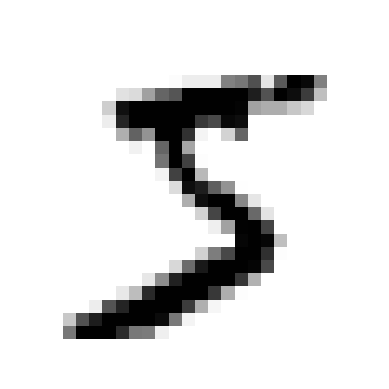

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis("off")
plt.show()

In [5]:
y[0]

'5'

In [6]:
import numpy as np
y = y.astype(np.uint8)

In [7]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [8]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [10]:
sgd_clf.predict([some_digit])

array([ True])

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone, BaseEstimator

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.base import BaseEstimator



class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

In [17]:

y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [19]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_predict)

0.8370879772350012

In [20]:
recall_score(y_train_5, y_train_predict)

0.6511713705958311

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.7325171197343847

In [23]:
y_scores= sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [25]:
threshold = 0.
y_some_digit_predict = (y_scores>threshold)
y_some_digit_predict

array([ True])

In [28]:
threshold = 8000
y_some_digit_predict = (y_scores>threshold)
y_some_digit_predict

array([False])

In [29]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [30]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

In [45]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label = "Precision",linewidth = 2)
    plt.plot(thresholds,recalls[:-1],"g--",label = "Recall",linewidth = 2)
    plt.legend(loc = "center right",fontsize = 16)
    plt.xlabel("Threshold",fontsize = 16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

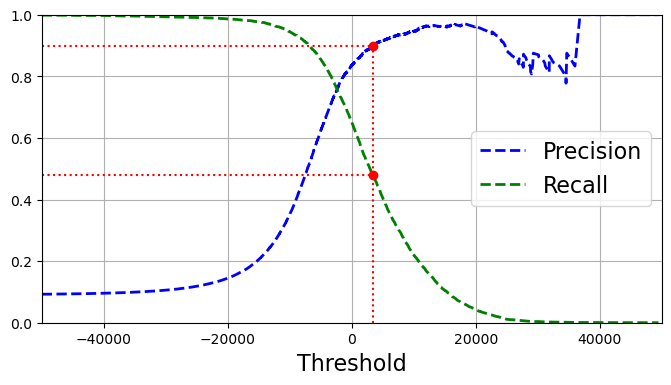

In [48]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown

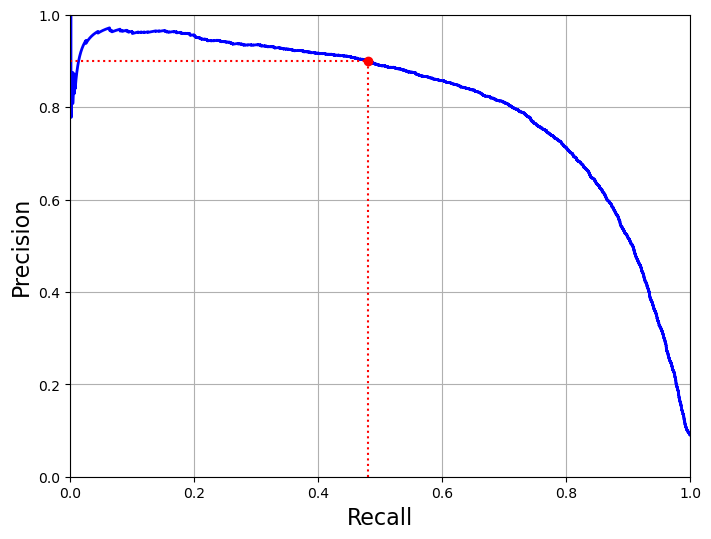

In [49]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")

In [50]:
y_train_predict_90 = (y_scores>threshold_90_precision)

In [51]:
precision_score(y_train_5,y_train_predict_90)

0.9

In [52]:
recall_score(y_train_5,y_train_predict_90)

0.47980077476480354

In [53]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

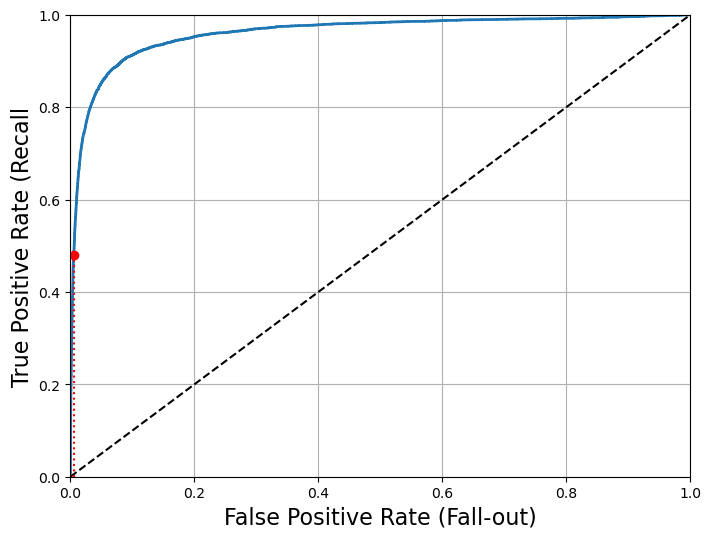

In [56]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0, 1], [0, 1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (Fall-out)',fontsize=16)
    plt.ylabel('True Positive Rate (Recall',fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [60]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv = 3,method = "predict_proba")

In [63]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

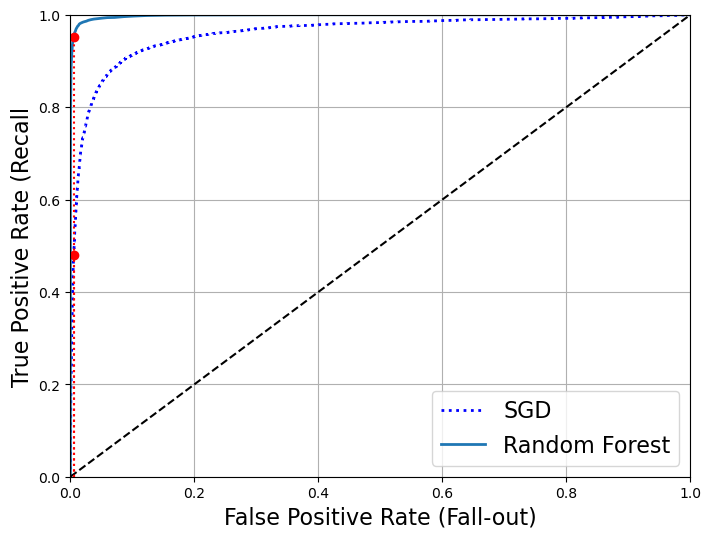

In [66]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)

In [70]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983296721818179

In [71]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5,y_train_pred_forest)

0.9898819561551433

In [72]:
recall_score(y_train_5,y_train_pred_forest)

0.8662608374838591

In [73]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [74]:
some_digit_scores  = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [76]:
np.argmax(some_digit_scores)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [77]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [78]:
svm_clf.classes_[5]

np.uint8(5)

In [79]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [80]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [81]:
len(ovr_clf.estimators_)

10

In [82]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [83]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [84]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [86]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [88]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

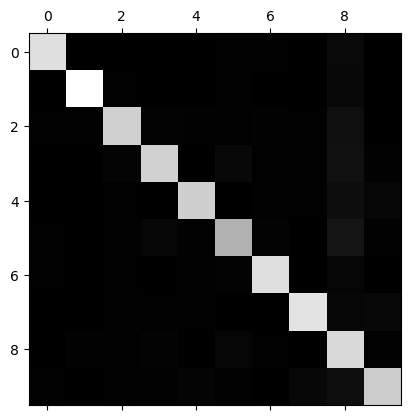

In [90]:
plt.matshow(conf_mx,cmap = plt.cm.gray)

In [91]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

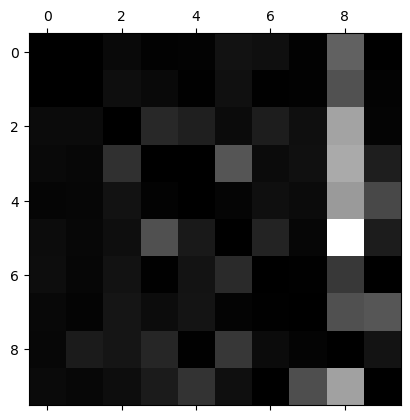

In [93]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap = plt.cm.gray)

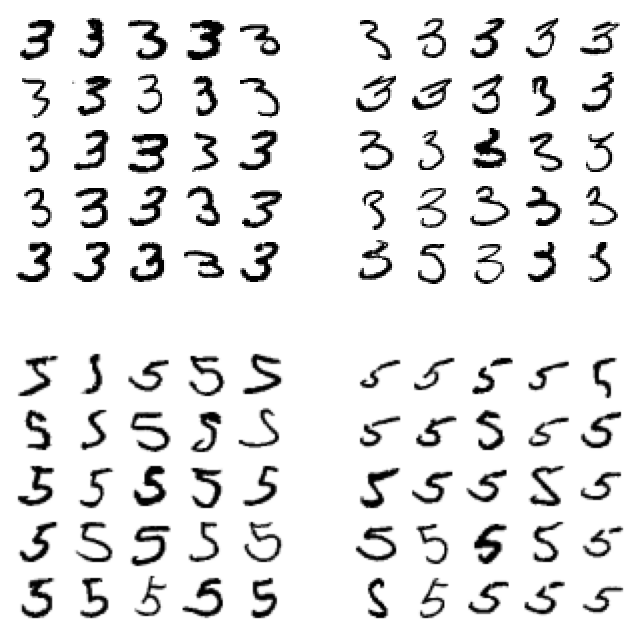

In [95]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)

    n_rows = (len(instances) - 1) // images_per_row + 1

    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

cl_a,cl_b = 3,5
X_aa = X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred==cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred==cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred==cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222);plot_digits(X_ab[:25], images_per_row = 5)
plt.subplot(223);plot_digits(X_ba[:25], images_per_row = 5)
plt.subplot(224);plot_digits(X_bb[:25], images_per_row = 5)

In [96]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>=7)
y_train_odd = (y_train%2==1)
y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train,y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [97]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [98]:
y_train_knn_predict = cross_val_predict(knn_clf,X_train,y_multilabel,cv=3)
f1_score(y_multilabel,y_train_knn_predict,average="macro")

0.9764102655606048

In [99]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train+noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test+noise
y_train_mod = X_train
y_test_mod = X_test

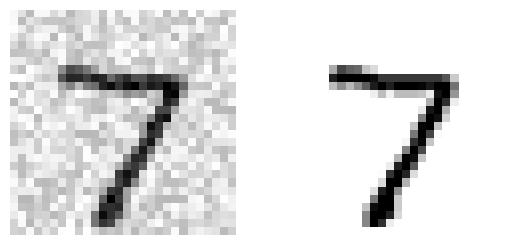

In [101]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])

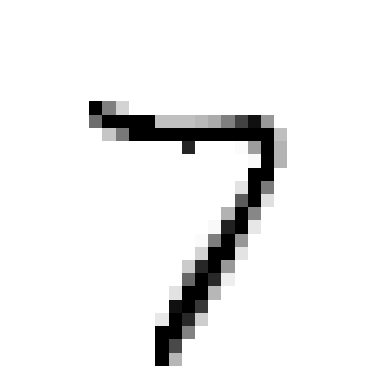

In [116]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

In [119]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}]
knn_clf = KNeighborsClassifier(n_jobs=3)
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,n_jobs=4,verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


python(5914) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5915) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5916) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(5917) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV 4/5] END ....n_neighbors=2, weights=uniform;, score=0.963 total time=  24.3s
[CV 2/5] END ....n_neighbors=2, weights=uniform;, score=0.963 total time=  25.1s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.964 total time=  25.3s
[CV 3/5] END ....n_neighbors=2, weights=uniform;, score=0.962 total time=  25.3s
[CV 5/5] END ....n_neighbors=2, weights=uniform;, score=0.964 total time=  20.3s
[CV 1/5] END ...n_neighbors=2, weights=distance;, score=0.970 total time=  23.7s
[CV 2/5] END ...n_neighbors=2, weights=distance;, score=0.971 total time=  23.6s
[CV 3/5] END ...n_neighbors=2, weights=distance;, score=0.969 total time=  23.8s
[CV 4/5] END ...n_neighbors=2, weights=distance;, score=0.969 total time=  23.2s
[CV 5/5] END ...n_neighbors=2, weights=distance;, score=0.968 total time=  23.2s
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  23.7s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  23.6s
[CV 3/5] END ....n_neighbors

,estimator,KNeighborsClassifier(n_jobs=3)
,param_grid,"[{'n_neighbors': [2, 3, ...], 'weights': ['uniform', 'distance']}]"
,scoring,None
,n_jobs,4
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,4


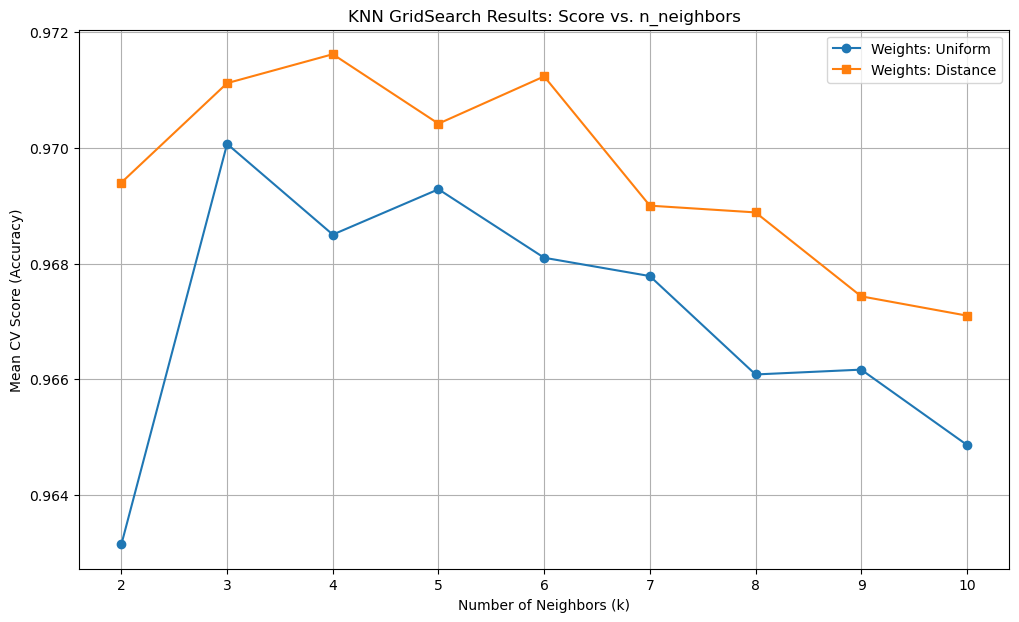

In [120]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)

uniform_results = results[results['param_weights'] == 'uniform'].sort_values('param_n_neighbors')
distance_results = results[results['param_weights'] == 'distance'].sort_values('param_n_neighbors')


plt.figure(figsize=(12, 7))

plt.plot(uniform_results['param_n_neighbors'], uniform_results['mean_test_score'], marker='o', label='Weights: Uniform')
plt.plot(distance_results['param_n_neighbors'], distance_results['mean_test_score'], marker='s', label='Weights: Distance')

plt.title('KNN GridSearch Results: Score vs. n_neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean CV Score (Accuracy)')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [122]:
grid_search.best_score_

np.float64(0.9716166666666666)

In [123]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

In [124]:
from scipy.ndimage.interpolation import shift

/var/folders/g7/l_cpwztd3pv4m_3_jnk0jpd80000gn/T/ipykernel_1920/1098188985.py:1: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


In [125]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

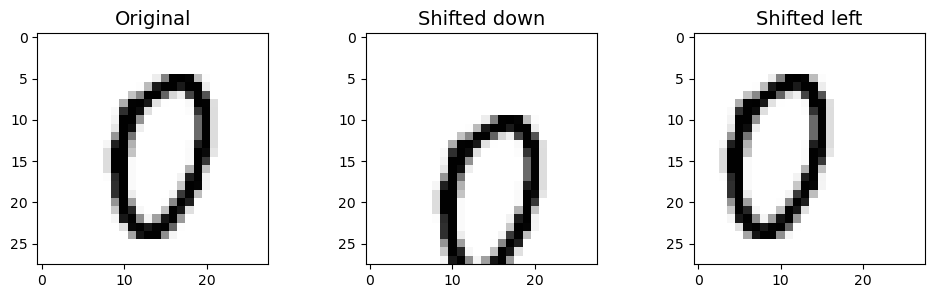

In [126]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [127]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [128]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [132]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_,n_jobs=-1)

In [133]:
knn_clf.fit(X_train_augmented, y_train_augmented)

,n_neighbors,4
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [134]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763

In [135]:
train_data = pd.read_csv('data/titanic/train.csv')
test_data = pd.read_csv('data/titanic/test.csv')

In [136]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [138]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [139]:
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

In [140]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [141]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [142]:
train_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [143]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [144]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [145]:
X_train = train_data.drop("Survived", axis=1)

y_train = train_data["Survived"].copy()

In [208]:
def extract_title(X):
    """Extracts 'Title' from the 'Name' column."""
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=['Name'])

    titles = X['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

    titles = titles.replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                             'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    titles = titles.replace('Mlle', 'Miss')
    titles = titles.replace('Ms', 'Miss')
    titles = titles.replace('Mme', 'Mrs')

    titles = titles.fillna('Unknown')

    return titles.to_frame()

def create_family_size(X):
    """Creates 'FamilySize' from 'SibSp' and 'Parch'."""
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=['SibSp', 'Parch'])

    family_size = X['SibSp'] + X['Parch'] + 1
    return family_size.to_frame()

def create_age_buckets(X):
    """Converts continuous 'Age' into categorical buckets of 15 years."""
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=['Age'])

    bins = [0, 15, 30, 45, 60, np.inf]
    labels = ['0-14', '15-29', '30-44', '45-59', '60+']

    age_buckets = pd.cut(X.iloc[:, 0], bins=bins, labels=labels, right=False)

    return age_buckets.to_frame()

In [209]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer


title_cols = ['Name']
family_cols = ['SibSp', 'Parch']
age_cols = ['Age']
simple_numeric_cols = ['Fare']
simple_categorical_cols = ['Pclass', 'Sex', 'Embarked']


title_pipeline = Pipeline([
    ('extractor', FunctionTransformer(extract_title)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


family_pipeline = Pipeline([
    ('creator', FunctionTransformer(create_family_size)),
    ('scaler', StandardScaler())
])

age_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Impute missing ages
    ('binner', FunctionTransformer(create_age_buckets)), # Create buckets
    ('imputer_binned', SimpleImputer(strategy='most_frequent')), # Fills any NaNs from bucketing
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('title', title_pipeline, title_cols),
    ('family', family_pipeline, family_cols),
    ('age', age_pipeline, age_cols),
    ('num', numeric_pipeline, simple_numeric_cols),
    ('cat', categorical_pipeline, simple_categorical_cols)
], remainder='drop')

In [210]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

svc_model = SVC(gamma="auto", random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [211]:
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('model', svc_model)
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

In [212]:
svc_scores = cross_val_score(pipeline_svc, X_train, y_train, cv=10, scoring="accuracy")
print(svc_scores.mean())
print(svc_scores.std())

0.8361423220973784
0.03522640654465153


In [213]:
rf_scores = cross_val_score(pipeline_rf, X_train, y_train, cv=10, scoring="accuracy")
print(rf_scores.mean())
print(rf_scores.std())

0.8103745318352059
0.044241088517648866


In [214]:
xgb_scores = cross_val_score(pipeline_xgb, X_train, y_train, cv=10, scoring="accuracy")
print(xgb_scores.mean())
print(xgb_scores.std())

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:52] WARNING: /Users/r

0.8350811485642945
0.05219447490216711


In [215]:
param_grid = {
    'model__C': [0.1, 1, 10, 100, 1000],
    'model__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'model__kernel': ['rbf']
}

grid_search = GridSearchCV(pipeline_svc, param_grid, cv=5,scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


python(9120) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9121) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9122) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9123) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9124) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9125) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9126) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9127) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9128) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9129) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9130) MallocStackLoggin

[CV] END ....model__C=0.1, model__gamma=1, model__kernel=rbf; total time=   0.0s
[CV] END ....model__C=0.1, model__gamma=1, model__kernel=rbf; total time=   0.0s
[CV] END ..model__C=0.1, model__gamma=0.1, model__kernel=rbf; total time=   0.0s
[CV] END ..model__C=0.1, model__gamma=0.1, model__kernel=rbf; total time=   0.0s
[CV] END ..model__C=0.1, model__gamma=0.1, model__kernel=rbf; total time=   0.0s
[CV] END ....model__C=0.1, model__gamma=1, model__kernel=rbf; total time=   0.0s
[CV] END .model__C=0.1, model__gamma=0.01, model__kernel=rbf; total time=   0.0s
[CV] END ..model__C=0.1, model__gamma=0.1, model__kernel=rbf; total time=   0.0s
[CV] END ....model__C=0.1, model__gamma=1, model__kernel=rbf; total time=   0.0s
[CV] END ..model__C=0.1, model__gamma=0.1, model__kernel=rbf; total time=   0.1s
[CV] END ....model__C=0.1, model__gamma=1, model__kernel=rbf; total time=   0.1s
[CV] END .model__C=0.1, model__gamma=0.01, model__kernel=rbf; total time=   0.0s
[CV] END .model__C=0.1, mode

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__C': [0.1, 1, ...], 'model__gamma': [1, 0.1, ...], 'model__kernel': ['rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('title', ...), ('family', ...), ...]"


In [216]:
grid_search.best_params_

{'model__C': 100, 'model__gamma': 0.01, 'model__kernel': 'rbf'}

In [217]:
best_model = grid_search.best_estimator_
grid_search.best_score_

np.float64(0.8383717280773336)

In [218]:
y_pred_test = best_model.predict(test_data)

In [219]:
test_passenger_ids = test_data.index

submission = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": y_pred_test
})

submission.to_csv("submission.csv", index=False)

In [220]:
param_grid_xgb = {
    'model__n_estimators': [100, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=300; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=300; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=300; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=300; total time=   0.0s
[CV] END model__learning_rate=0.01, mo

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:57] WARNING: /Users/r

[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=7, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=5, model__n_estimators=500; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/r

[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=7, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=3, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.01, model__max_depth=7, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.05, model__max_depth=7, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=500; total time=   0.1s


/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/r

[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=500; total time=   0.0s
[CV] END model__learning_rate=0.05, model__max_depth=7, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.1, model__max_depth=3, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=300; total time=   0.0s
[CV] END model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100; total time=   0.1s
[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.05, model__max_depth=5, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.1, model__max_depth=7, model__n_estimators=100; total time=   0.0s
[CV] END

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/r

[CV] END model__learning_rate=0.1, model__max_depth=5, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.1, model__max_depth=7, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.2, model__max_depth=5, model__n_estimators=100; total time=   0.0s
[CV] END model__learning_rate=0.2, model__max_depth=3, model__n_estimators=500; total time=   0.1s
[CV] END model__learning_rate=0.1, model__max_depth=7, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.2, model__max_depth=5, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.2, model__max_depth=5, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.2, model__max_depth=5, model__n_estimators=300; total time=   0.1s
[CV] END model__learning_rate=0.2, model__max_depth=5, model__n_estimators=300; total time=   0.1s
[CV] END m

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/ml/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [14:43:58] WARNING: /Users/r

[CV] END model__learning_rate=0.2, model__max_depth=7, model__n_estimators=500; total time=   0.1s


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'model__learning_rate': [0.01, 0.05, ...], 'model__max_depth': [3, 5, ...], 'model__n_estimators': [100, 300, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('title', ...), ('family', ...), ...]"


In [221]:
grid_search_xgb.best_params_

{'model__learning_rate': 0.2,
 'model__max_depth': 3,
 'model__n_estimators': 500}

In [222]:
grid_search_xgb.best_score_

np.float64(0.8395329860021341)

In [223]:
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_test_xgb = best_xgb_model.predict(test_data)
test_passenger_ids = test_data.index


submission_xgb = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": y_pred_test_xgb
})

submission_xgb.to_csv("submission_xgb.csv", index=False)

In [224]:
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 15],
    'model__min_samples_leaf': [1, 3, 5]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100; total time=   0.2s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100; total time=   0.1s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=100; total time=   0.2s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=200; total time=   0.2s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=200; total time=   0.2s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=200; total time=   0.2s
[CV] END model__max_depth=5, model__min_samples_leaf=1, model__n_estimators=200; total time=   0.2s
[CV] END model__max_depth=5, model__mi

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [5, 10, ...], 'model__min_samples_leaf': [1, 3, ...], 'model__n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('title', ...), ('family', ...), ...]"


In [225]:
grid_search_rf.best_params_

{'model__max_depth': 5,
 'model__min_samples_leaf': 5,
 'model__n_estimators': 100}

In [226]:
grid_search_rf.best_score_

np.float64(0.8327537505492437)

In [227]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_test_rf = best_rf_model.predict(test_data)

test_passenger_ids = test_data.index

submission_rf = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": y_pred_test_rf
})

submission_rf.to_csv("submission_rf.csv", index=False)

In [234]:
import os
import tarfile
import urllib.request

# --- Constants ---
DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
SPAM_PATH = os.path.join("data", "spam")

# A list of all the files we want to download
DATASET_FILES = [
    "20030228_easy_ham.tar.bz2",
    "20030228_easy_ham_2.tar.bz2",
    "20030228_hard_ham.tar.bz2",
    "20030228_spam.tar.bz2",
    "20030228_spam_2.tar.bz2"
]

# --- Download and Extract Function ---

def fetch_spam_data(spam_path=SPAM_PATH):
    """
    Downloads and extracts all 5 spam/ham datasets.
    """
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)

    for filename in DATASET_FILES:
        url = DOWNLOAD_ROOT + filename
        path = os.path.join(spam_path, filename)

        # Download if it doesn't exist
        if not os.path.isfile(path):
            print(f"Downloading {filename}...")
            urllib.request.urlretrieve(url, path)
        else:
            print(f"Found {filename}.")

        # Extract the contents
        try:
            print(f"Extracting {filename}...")
            tar_bz2_file = tarfile.open(path)
            tar_bz2_file.extractall(path=spam_path)
            tar_bz2_file.close()
        except Exception as e:
            print(f"Error extracting {filename}: {e}")

In [235]:
fetch_spam_data()

Extracting 20030228_easy_ham.tar.bz2...
Extracting 20030228_easy_ham_2.tar.bz2...
Extracting 20030228_hard_ham.tar.bz2...
Extracting 20030228_spam.tar.bz2...
Extracting 20030228_spam_2.tar.bz2...


In [236]:
HAM_DIRS = [
    os.path.join(SPAM_PATH, "easy_ham"),
    os.path.join(SPAM_PATH, "easy_ham_2"),
    os.path.join(SPAM_PATH, "hard_ham")
]
SPAM_DIRS = [
    os.path.join(SPAM_PATH, "spam"),
    os.path.join(SPAM_PATH, "spam_2")
]

ham_filenames = []
for d in HAM_DIRS:
    if os.path.isdir(d):
        for name in sorted(os.listdir(d)):
            if len(name) > 20:
                ham_filenames.append(os.path.join(d, name))
    else:
        print(f"Warning: Directory not found {d}")

spam_filenames = []
for d in SPAM_DIRS:
    if os.path.isdir(d):
        for name in sorted(os.listdir(d)):
            if len(name) > 20:
                spam_filenames.append(os.path.join(d, name))
    else:
        print(f"Warning: Directory not found {d}")

print(f"Loaded {len(ham_filenames)} ham emails.")
print(f"Loaded {len(spam_filenames)} spam emails.")

Loaded 4150 ham emails.
Loaded 1897 spam emails.


In [240]:
import email
import email.policy

def load_email(full_path):
    """
    Loads an email from its full file path.
    """
    with open(full_path, "rb") as f:
        # Use the BytesParser with the default policy
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [241]:
ham_emails = [load_email(full_path=name) for name in ham_filenames]
spam_emails = [load_email(full_path=name) for name in spam_filenames]
print(f"Total ham emails loaded: {len(ham_emails)}")
print(f"Total spam emails loaded: {len(spam_emails)}")

Total ham emails loaded: 4150
Total spam emails loaded: 1897


In [243]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [244]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


In [245]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [246]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [247]:
structures_counter(ham_emails).most_common()

[('text/plain', 3832),
 ('text/html', 120),
 ('multipart(text/plain, application/pgp-signature)', 101),
 ('multipart(text/plain, text/html)', 63),
 ('multipart(text/plain, text/plain)', 5),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 2),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(text/plain, multipart(text/plain))', 2),
 ('multipart(text/plain, application/x-pkcs7-signature)', 2),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  2),
 ('multipart(text/html)', 2),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, video/mng)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, application/x-java-applet)', 1),
 ('multipart(text/plain, application/x-patch)', 1

In [248]:
structures_counter(spam_emails).most_common()

[('text/plain', 816),
 ('text/html', 772),
 ('multipart(text/plain, text/html)', 159),
 ('multipart(text/html)', 49),
 ('multipart(text/plain)', 44),
 ('multipart(multipart(text/html))', 23),
 ('multipart(multipart(text/plain, text/html))', 5),
 ('multipart(text/plain, application/octet-stream)', 3),
 ('multipart(text/html, text/plain)', 3),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/plain, application/octet-stream, text/plain)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart/alternative', 2),
 ('multipart(text/html, image/jpeg)', 2),
 ('multipart(multipart(text/plain), application/octet-stream)', 2),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(multipart(text/plain, text/html), image/jpeg, image/jpeg, image/jpeg, image/jpeg, image/jpeg)',
  1),
 ('multipart(multipart(text/plain, 

In [249]:
for header, value in spam_emails[0].items():
    print(header,":",value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

In [250]:
spam_emails[0]["Subject"]

'Life Insurance - Why Pay More?'

In [251]:
from sklearn.model_selection import train_test_split

X = np.array(ham_emails + spam_emails, dtype=object)
y = np.array([0] * len(ham_emails) + [1] * len(spam_emails))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [252]:
import re
from bs4 import BeautifulSoup
from html import unescape # We might still need this, though BS handles a lot

def html_to_plain_text(html):
    """
    Converts HTML to plain text using BeautifulSoup.
    """
    try:
        soup = BeautifulSoup(html, "html.parser")

        text = soup.get_text()

        text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S)

        return unescape(text)

    except Exception as e:
        print(f"Error parsing HTML: {e}")
        return ""

In [253]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if get_email_structure(email) == "text/html"]
sample_html_spam = html_spam_emails[7]
print(sample_html_spam.get_content().strip()[:1000], "...")

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">
<HTML><HEAD><TITLE>Digital Authoring Tools : Featured Product Alert</TITLE>
<META http-equiv=Content-Type content="text/html; charset=windows-1252">
<META content="MSHTML 6.00.2462.0" name=GENERATOR></HEAD>
<BODY text=#666666 vLink=#6699cc aLink=#66cc66 link=#000066 bgColor=#ffffff>
<DIV align=center>
<P><A href="http://www.05-cray.category.unique.zaam.net.co.fr&#20;&#2;&#20;&#5;&#20;|https.am2002.goopt.com:8101"><IMG height=93 src="http://www.05-cray.category.unique.zaam.net.co.fr&#20;&#2;&#20;&#5;&#20;|https.am2002.goopt.com:8101/images/emailhead6.gif" width=536 border=0 alt="If you are seeing this text AND a blank image, server demand is currently too high and you may be unable to download the FREE software.  Please re-open this mail again soon to retry, so that you may download FREE Software from Digital Authoring Tools."></A><BR></P>
<TABLE cellSpacing=0 cellPadding=3 width=536 border=0>
  <TBODY>
  <TR>
    <T

In [254]:
print(html_to_plain_text(sample_html_spam.get_content())[:1000], "...")


Digital Authoring Tools : Featured Product Alert
Today you had 100 Digital Web Books downloaded and within two weeks there are 600 circulating.
Two months later you have 4000 in the marketplace. Tidal Wave or Viral Marketing is a wonder of our new society. See how major corporations have already embraced Digital Page Author.
IMAGINE a tool that is very easy to learn yet will enable you to create brilliant, 3D, real-life, book-like, page-turning digital documents that you can distribute via the internet, store on web-sites and send on floppy or a cd-rom, complete with active web and email links!
VIEW SAMPLES
DOWNLOAD FREE SOFTWARE
Digital Page Author enables companies and
      individuals to produce their own professional looking catalogues,
      brochures, photo albums, invitations and more--in-house--without the associated costs
      of an outside design and/or print shop.Due to their extremly
      small file size, Digital Web Books created with Digital Page Author can be
      s

In [255]:
def email_to_text(email):
    """
    Extracts plain text content from an email object,
    prioritizing text/plain over text/html.
    """
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"):
            continue
        try:
            content = part.get_content()
        except:
            content = str(part.get_payload())

        if ctype == "text/plain":
            return content
        else:
            html = content

    if html:
        return html_to_plain_text(html)

In [256]:
print(email_to_text(sample_html_spam)[:100], "...")


Digital Authoring Tools : Featured Product Alert
Today you had 100 Digital Web Books downloaded and ...


In [257]:
import nltk

stemmer = nltk.PorterStemmer()
for word in ("Computations", "Computation", "Computing", "Computed", "Compute", "Compulsive"):
    print(word, "=>", stemmer.stem(word))

Computations => comput
Computation => comput
Computing => comput
Computed => comput
Compute => comput
Compulsive => compuls


In [262]:
import urlextract

url_extractor = urlextract.URLExtract()
print(url_extractor.find_urls("Will it detect github.com and https://youtu.be/7Pq-S557XQU?t=3m32s"))

['github.com', 'https://youtu.be/7Pq-S557XQU?t=3m32s']


In [263]:
from sklearn.base import TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ""
            if self.lower_case:
                text = text.lower()
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text)))
                urls.sort(key=lambda url: len(url), reverse=True)
                for url in urls:
                    text = text.replace(url, " URL ")
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', 'NUMBER', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            word_counts = Counter(text.split())
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word)
                    stemmed_word_counts[stemmed_word] += count
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [264]:
X_few = X_train[:3]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'the': 6, 'to': 5, 'ha': 4, 'for': 4, 'indian': 4, 'more': 4, 'you': 4, 'and': 3, 'our': 3, 'help': 3, 'tribe': 2, 'been': 2, 'year': 2, 'emerg': 2, 'of': 2, 'program': 2, 'women': 2, 'than': 2, 'beauti': 2, 'thi': 2, 'we': 2, 'may': 2, 'dear': 1, 'friend': 1, 'serv': 1, 'while': 1, 'share': 1, 'cultur': 1, 'mission': 1, 'american': 1, 'heritag': 1, 'foundat': 1, 'past': 1, 'number': 1, 'mani': 1, 'aihf': 1, 'met': 1, 'request': 1, 'from': 1, 'hundr': 1, 'with': 1, 'food': 1, 'cloth': 1, 'medic': 1, 'suppli': 1, 'grant': 1, 'student': 1, 'eagl': 1, 'award': 1, 'inspir': 1, 'youth': 1, 'aspir': 1, 'scholarship': 1, 'young': 1, 'meant': 1, 'just': 1, 'financi': 1, 'aid': 1, 'hundrend': 1, 'worthwhil': 1, 'endeavor': 1, 'is': 1, 'entir': 1, 'fund': 1, 'by': 1, 'veri': 1, 'gener': 1, 'peopl': 1, 'like': 1, 'who': 1, 'want': 1, 'make': 1, 'a': 1, 'differ': 1, 'need': 1, 'your': 1, 'now': 1, 'ever': 1, 'click': 1, 'here': 1, 'learn': 1, 'mayb': 1, 'can': 1, 'alway': 1, 'walk'

In [265]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [266]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 32 stored elements and shape (3, 11)>

In [267]:
X_few_vectors.toarray()

array([[ 110,    6,    1,    3,    1,    5,    0,    4,    4,    2,    1],
       [1249,   66,   38,   21,   19,   43,   20,   16,   27,   34,   30],
       [ 231,    9,   37,    8,    8,    3,    7,    2,    1,    3,    4]])

In [268]:
vocab_transformer.vocabulary_

{'the': 1,
 'number': 2,
 'and': 3,
 'is': 4,
 'to': 5,
 'i': 6,
 'you': 7,
 'for': 8,
 'of': 9,
 'a': 10}

In [269]:
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer()),
])

X_train_transformed = preprocess_pipeline.fit_transform(X_train)

In [279]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
score.mean()

[CV] END ................................ score: (test=0.976) total time=   0.3s
[CV] END ................................ score: (test=0.975) total time=   0.4s
[CV] END ................................ score: (test=0.977) total time=   0.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s finished


np.float64(0.9760181055803319)

In [276]:
X_test_transformed = preprocess_pipeline.transform(X_test)

log_clf.fit(X_train_transformed, y_train)

y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 97.38%
Recall: 97.89%
